In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM
from sklearn.model_selection import train_test_split

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df = pd.read_csv('/content/drive/MyDrive/Diplomado en ciencia de datos/Modulo VI. Redes Neuronales/My proyects/CarPriceDataset_Final.csv')

In [41]:
for col in df.columns:
  if df[col].dtype=='object':
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [42]:
df.head()

,ID,Company,Model,Type,Fuel,Transmission,Engine,Mileage,Kms_driven,Buyers,Horsepower (kw),Year,Price (Lakhs)
0,1,13,8,2,5,1,796,19.7,45000,2,32,2010,1.2
1,2,13,82,2,5,1,998,20.5,40005,2,46,2011,3.0
2,3,13,82,2,5,1,998,20.5,40005,2,46,2018,4.0
3,4,13,29,3,5,0,1462,18.5,28000,2,73,2012,5.1
4,5,13,29,3,5,0,1462,18.5,40000,2,73,2012,4.0


In [43]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=False)


In [45]:
model = Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
#Entrenamiento del modelo
model.fit(X_train,y_train, epochs=50,batch_size=16,validation_split=0.1)

predicted_prices = model.predict(X_test)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0311 - mae: 0.0942 - val_loss: 0.0075 - val_mae: 0.0724
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0106 - mae: 0.0610 - val_loss: 0.0035 - val_mae: 0.0509
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0117 - mae: 0.0712 - val_loss: 0.0038 - val_mae: 0.0518
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0148 - mae: 0.0813 - val_loss: 0.0036 - val_mae: 0.0506
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0103 - mae: 0.0634 - val_loss: 0.0031 - val_mae: 0.0474
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0071 - mae: 0.0465 - val_loss: 0.0031 - val_mae: 0.0482
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0066 - mae: 0.0454 - val_loss: 0.0029 - val_mae: 0.0439
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0071 - mae: 0.0464 - val_loss: 0.0029 - val_mae: 0.0415
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0057 - mae: 0.0414 - 

In [47]:
for pred, actual in zip(predicted_prices[:10], y_test[:10]):
  print(f'Predicted: {pred[0]:.2f} | Actual: {actual:.2f}')

Predicted: 0.10 | Actual: 0.03
Predicted: 0.01 | Actual: 0.08
Predicted: 0.10 | Actual: 0.05
Predicted: 0.03 | Actual: 0.11
Predicted: 0.11 | Actual: 0.11
Predicted: 0.04 | Actual: 0.06
Predicted: 0.08 | Actual: 0.03
Predicted: 0.02 | Actual: 0.08
Predicted: 0.09 | Actual: 0.05
Predicted: 0.04 | Actual: 0.04


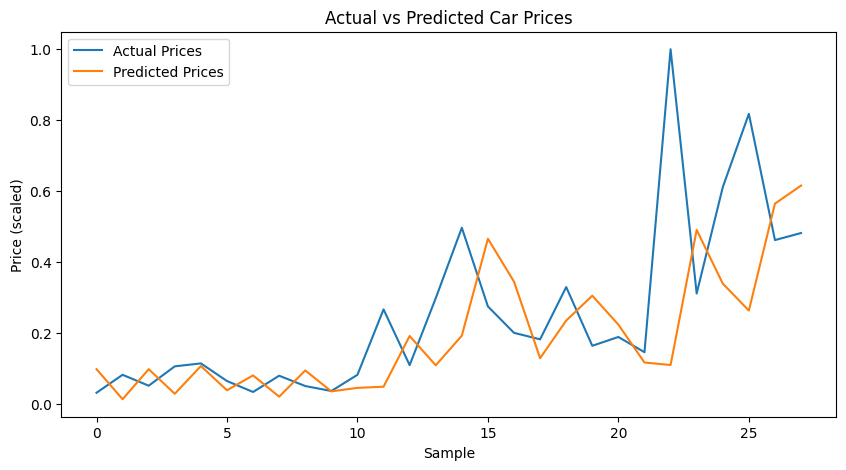

In [48]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Sample')
plt.ylabel('Price (scaled)')
plt.legend()
plt.show()

In [49]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MSE: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0548 - mae: 0.1462
Test MSE: 0.0548
Test MAE: 0.1462
